# Predicting NYC Water Consumption through Linear Regression 

#### Abstract 

This notebook will explore water consumption levels of New York City. Using data from NYC Open Data portal, datasets on NYC past population and water consumption levels as well as a dataset on projected population sizes for NYC in the coming decades. This notebook will explores these datasets and create a linear regression model to predict water consumption levels.


Water Consumption in the City of New York
https://data.cityofnewyork.us/Environment/Water-Consumption-in-the-City-of-New-York/ia2d-e54m


New York City Population by Borough, 1950 - 2040
https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9



In [1]:
#Managing datasets 
import pandas as pd
import numpy as np

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Regression model libraries 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('.../Water_Consumption_in_the_City_of_New_York.csv')
df.head()

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198


In [3]:
#Replacing column titles whitespaces with underscores
df.columns = list(map(lambda x: x.replace(' ', '_'), df.columns))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      43 non-null     int64  
 1   New_York_City_Population                  43 non-null     float64
 2   NYC_Consumption(Million_gallons_per_day)  43 non-null     float64
 3   Per_Capita(Gallons_per_person_per_day)    43 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


In [5]:
#Checking null counts for each column
df.isnull().sum()

Year                                        0
New_York_City_Population                    0
NYC_Consumption(Million_gallons_per_day)    0
Per_Capita(Gallons_per_person_per_day)      0
dtype: int64

In [6]:
# Checking Percentiles and Spread
df.describe()

,Year,New_York_City_Population,NYC_Consumption(Million_gallons_per_day),Per_Capita(Gallons_per_person_per_day)
count,43.000000,4.300000e+01,43.000000,43.000000
mean,2000.000000,7.903461e+06,1211.384651,155.534884
std,12.556539,5.685069e+05,181.197261,33.847943
min,1979.000000,7.071639e+06,979.000000,111.000000
25%,1989.500000,7.348947e+06,1015.070000,122.500000
50%,2000.000000,8.008278e+06,1205.500000,155.000000
75%,2010.500000,8.256564e+06,1368.750000,185.000000
max,2021.000000,8.826472e+06,1512.000000,213.000000


In [7]:
# Checking correlations
corr = df.corr()
corr

,Year,New_York_City_Population,NYC_Consumption(Million_gallons_per_day),Per_Capita(Gallons_per_person_per_day)
Year,1.000000,0.982505,-0.948502,-0.969326
New_York_City_Population,0.982505,1.000000,-0.942754,-0.967595
NYC_Consumption(Million_gallons_per_day),-0.948502,-0.942754,1.000000,0.994849
Per_Capita(Gallons_per_person_per_day),-0.969326,-0.967595,0.994849,1.000000


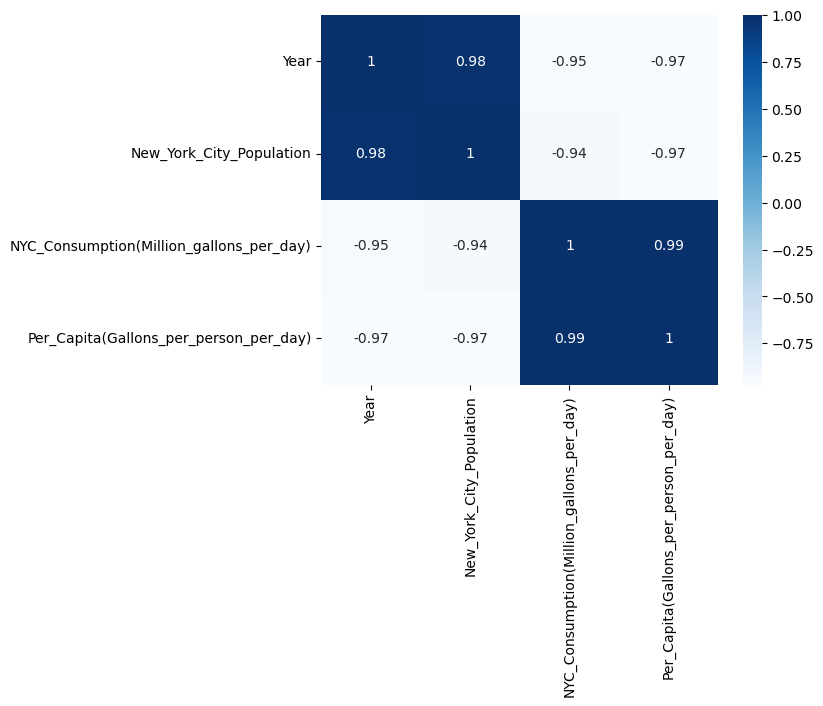

In [8]:
# Applying Heatmap to correlations
sns.heatmap(corr, cmap = 'Blues', annot= True);
plt.show()

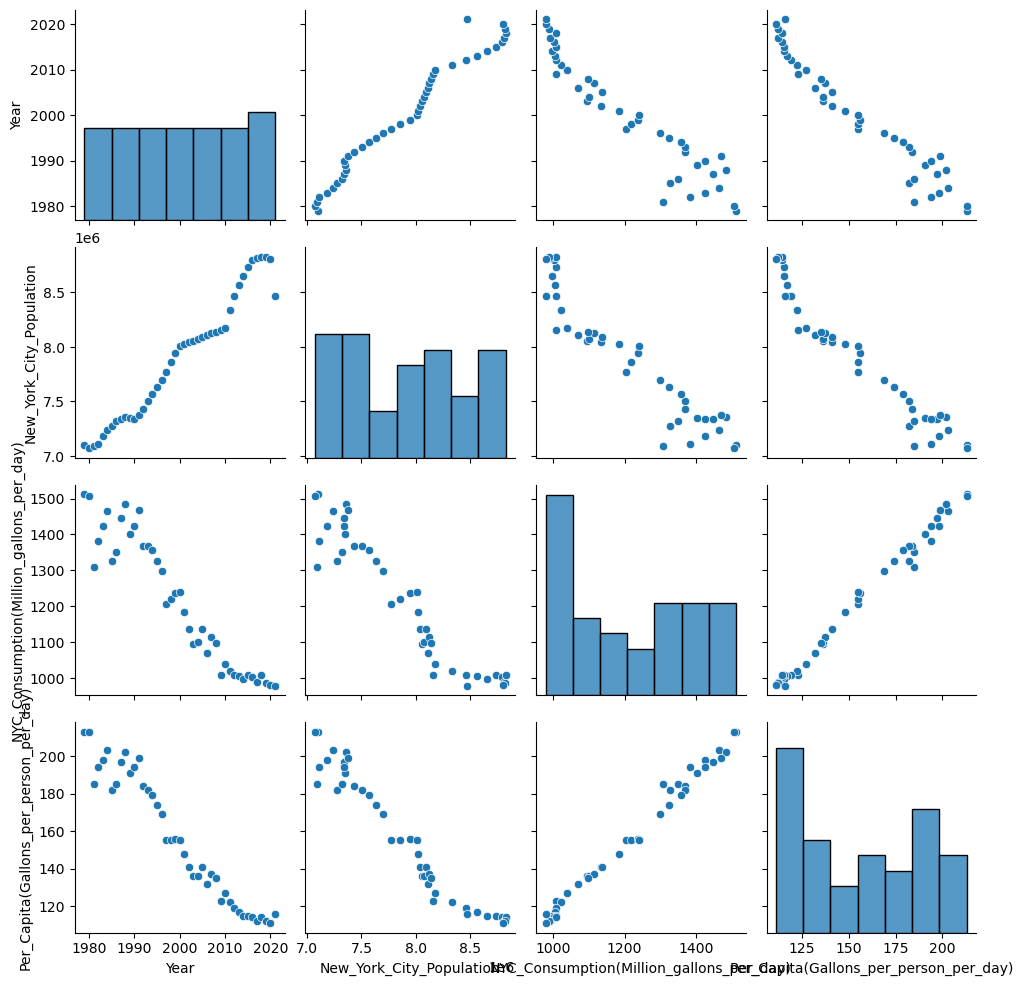

In [9]:
# Plotting Relationships between all vairaibles 
sns.pairplot(df)
plt.show()

/home/novascott/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

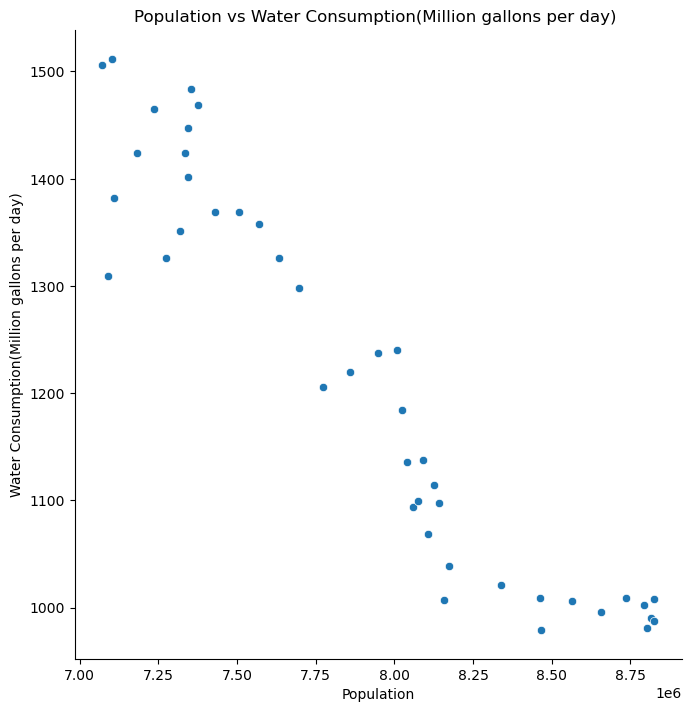

In [10]:
# Plotting relationship that we are investigating Population vs. Water Consumption
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['New_York_City_Population'],y_vars=['NYC_Consumption(Million_gallons_per_day)'],size=7,kind='scatter')
plt.xlabel('Population')
plt.ylabel('Water Consumption(Million gallons per day)')
plt.title('Population vs Water Consumption(Million gallons per day) ')
plt.show()

/home/novascott/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


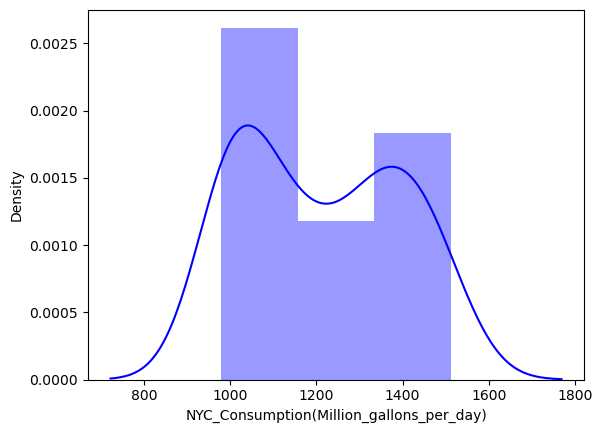

In [11]:
# Checking distribution
sns.distplot(df['NYC_Consumption(Million_gallons_per_day)'],color='blue')
plt.show()

In [12]:
# Model Splitting Variables 
x = df['New_York_City_Population']
y = df['NYC_Consumption(Million_gallons_per_day)']
# Build Model
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]


/tmp/ipykernel_746921/3633720056.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
/tmp/ipykernel_746921/3633720056.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]


In [13]:
# Training Model
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

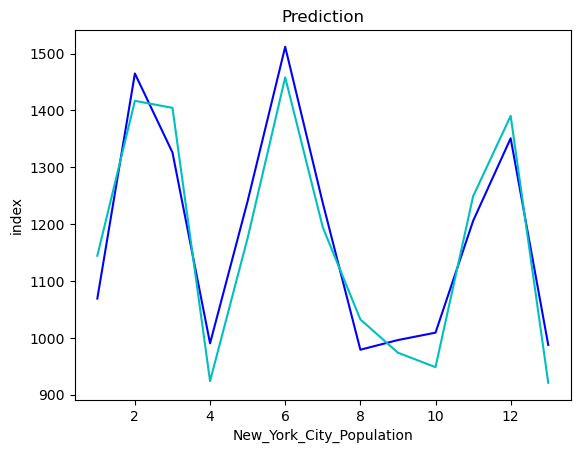

In [14]:
#Plotting Model Vs. Reality
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='b',linestyle='-')
plt.plot(c,y_pred,color='c',linestyle='-')
plt.xlabel('New_York_City_Population')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

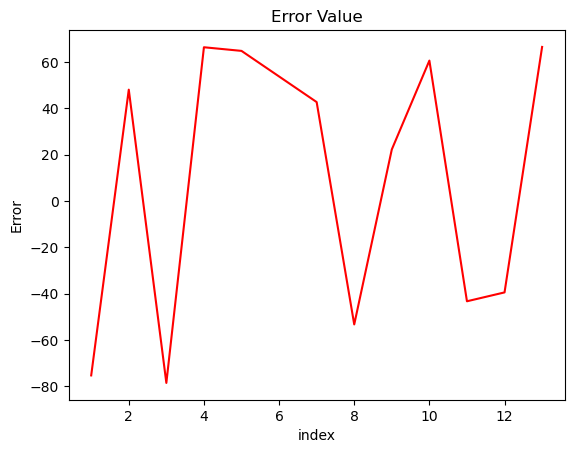

In [15]:
#Plotting Errors of Model Vs. Reality 
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='r',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [16]:
#Getting Mean Square and Root Square Values 
mse = mean_squared_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 3260.1415215650018
r square : 0.9033382283163438


In [17]:
#R Square of 90% : Great fit

In [18]:
#Getting Linear Equation 
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 3673.443175435478
Coefficient of the line: [-0.00031192]


/home/novascott/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/novascott/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


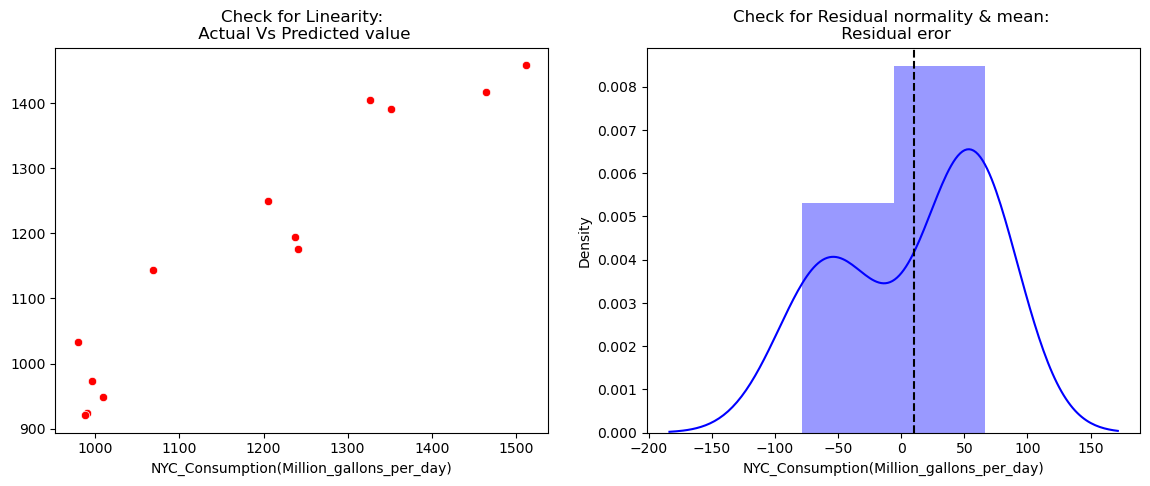

In [19]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

In [20]:
#Importing Population Prediction Dataset and Restructuring 
df_pop = pd.read_csv('.../New_York_City_Population_by_Borough__1950_-_2040.csv')
df_pop = df_pop.transpose()
df_pop.drop(df_pop.columns[[1,2,3,4,5]], axis=1, inplace=True)
df_pop = df_pop.drop(['1950 - Boro share of NYC total','1960 - Boro share of NYC total','1970 - Boro share of NYC total',
             '1980 - Boro share of NYC total','1990 - Boro share of NYC total','2000 - Boro share of NYC total',
             '2010 - Boro share of NYC total','2020 - Boro share of NYC total','2030 - Boro share of NYC total',
             '2040 - Boro share of NYC total','Age Group'])
df_pop = df_pop.rename(columns=df_pop.iloc[0]).drop(df_pop.index[0])
df_pop

,NYC Total
1950,7891957
1960,7781984
1970,7894862
1980,7071639
1990,7322564
2000,8008278
2010,8242624
2020,8550971
2030,8821027
2040,9025145


In [21]:
#Converting DataFrame to Series
pop = df_pop.squeeze()
#Restructuring Series to Array to work with Ski-Kit Linear Regression 
pop = pop[:,np.newaxis]
#Predicting with Linear Regression
pop_pred = lr.predict(pop)
#Converting Back to DataFrame
df_pop_pred = pd.DataFrame(pop_pred,columns=['Water Consumption Prediction'],index=['1950','1960','1970','1980','1990',
                                                                                   '2000','2010','2020','2030','2040'])
#Concating DataFrames
pred_df = pd.concat([df_pop,df_pop_pred], axis=1, join='inner')
pred_df

/tmp/ipykernel_746921/3724374047.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pop = pop[:,np.newaxis]


,NYC Total,Water Consumption Prediction
1950,7891957,1211.819142
1960,7781984,1246.121430
1970,7894862,1210.913028
1980,7071639,1467.689075
1990,7322564,1389.421668
2000,8008278,1175.536815
2010,8242624,1102.440655
2020,8550971,1006.262434
2030,8821027,922.027771
2040,9025145,858.360195
